
In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will  create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad



In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [30]:
ad_data=pd.read_csv("advertising.csv")

In [31]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [32]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [33]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis



<AxesSubplot:xlabel='Age', ylabel='Count'>

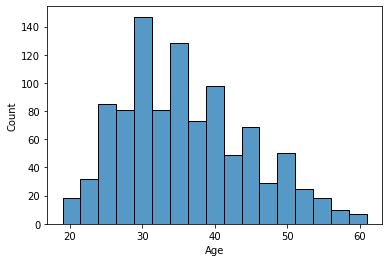

In [34]:
sns.histplot(ad_data['Age'])

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


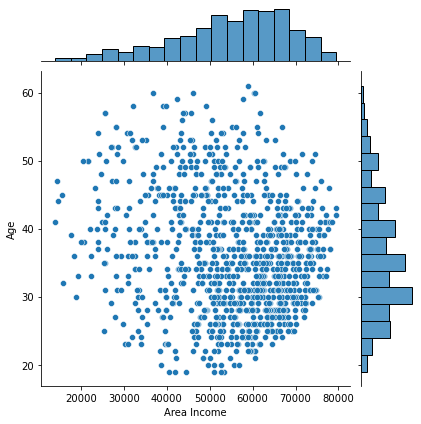

In [35]:
sns.jointplot("Area Income","Age",data=ad_data)

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


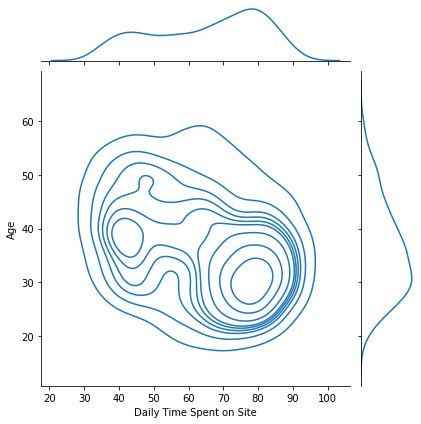

In [36]:
sns.jointplot('Daily Time Spent on Site','Age',data=ad_data,kind="kde")

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


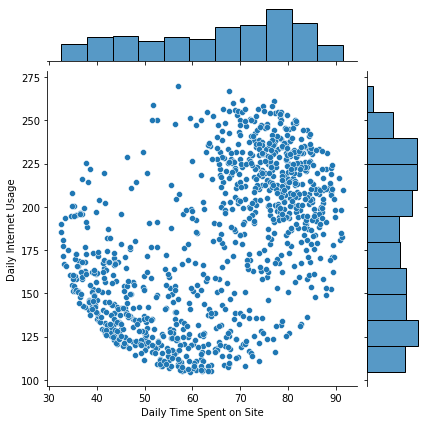

In [37]:
sns.jointplot('Daily Time Spent on Site','Daily Internet Usage',data=ad_data)

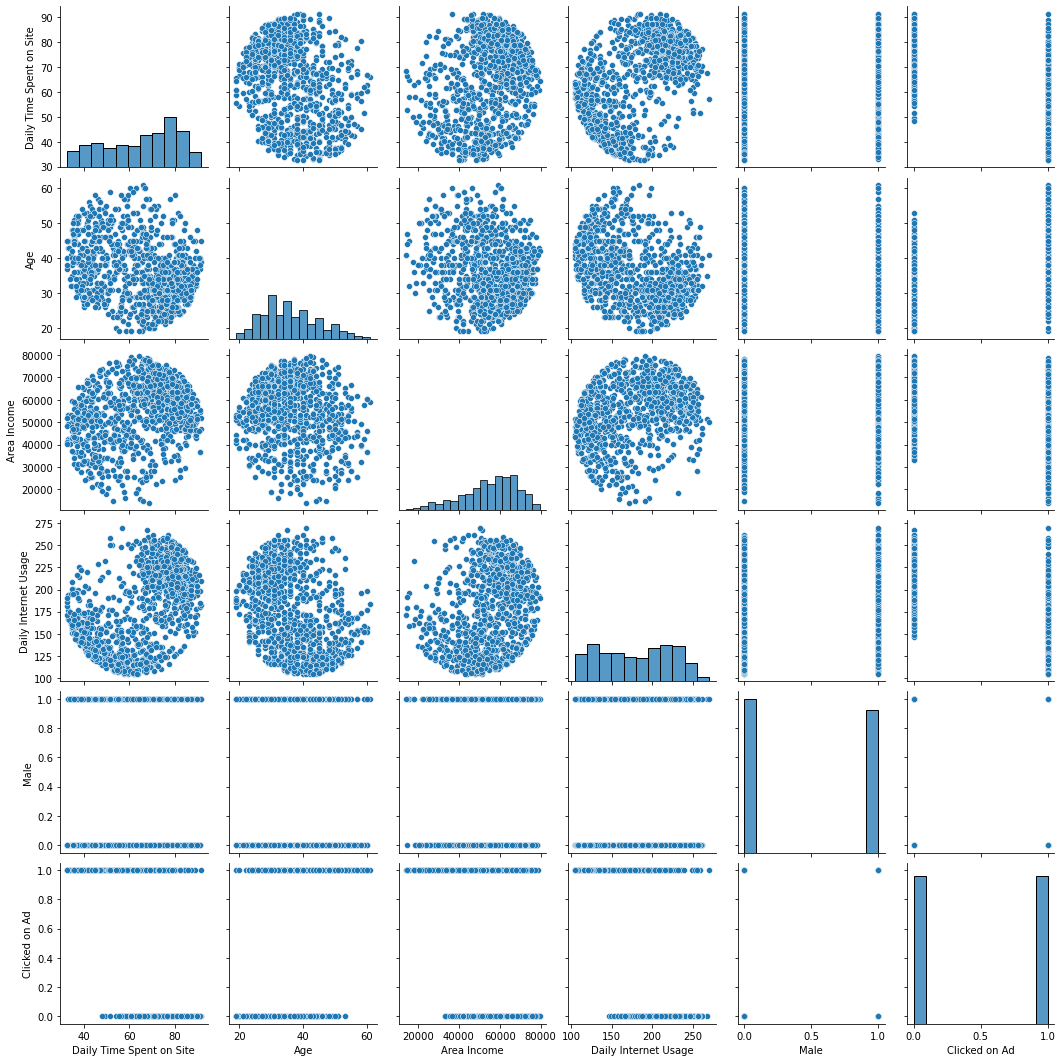

In [38]:
sns.pairplot(ad_data)

In [39]:
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [40]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [41]:
ad_data['City'].value_counts()

Lisamouth         3
Williamsport      3
North Daniel      2
Port Jason        2
Lake Patrick      2
                 ..
Lovemouth         1
Blevinstown       1
West Joseph       1
Johnsonfort       1
East Graceland    1
Name: City, Length: 969, dtype: int64

In [42]:
ad_data.drop(columns=['Ad Topic Line','City','Timestamp','Country'],axis=1,inplace=True)

In [43]:
ad_data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0
...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,1
996,51.30,45,67782.17,134.42,1,1
997,51.63,51,42415.72,120.37,1,1
998,55.55,19,41920.79,187.95,0,0


In [45]:
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Clicked on Ad'],
      dtype='object')

In [46]:
X=ad_data[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male']]

In [47]:
y=ad_data['Clicked on Ad']

# Logistic Regression



In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
lm=LogisticRegression()

In [54]:
pred=lm.fit(X_train,y_train)

## Predictions and Evaluations


In [56]:
pred=lm.predict(X_test)
print(pred)

[0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1
 1 0 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1
 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0
 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0 1 0 0 1 1 1 0 1 0
 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1
 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0
 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 1 0
 1 1 0 0]


In [58]:
from sklearn.metrics import classification_report

In [59]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       159
           1       0.91      0.83      0.87       141

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300

